In [139]:
!pip install pycocotools
import pandas as pd 
import os
from pycocotools.coco import COCO
import skimage.io as io
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

In [140]:
task=Path("/content/coco_instances_for_tasks_task_102_instances_default.json")

In [141]:
image1=Path('/content/Tasks_Task_102_readscan_309im_18patient_BA_20847.png')

In [142]:
image2=Path('/content/Tasks_Task_102_readscan_309im_18patient_BNE_21041.png')

In [143]:
import json

In [144]:
with open(task) as json_file:
    data = json.load(json_file)

In [ ]:
data['images'][0:1]

[{'coco_url': '',
  'date_captured': 0,
  'file_name': 'BA_13665.png',
  'flickr_url': '',
  'height': 256,
  'id': 0,
  'license': 0,
  'width': 256}]

In [145]:
data['info']

{'contributor': '',
 'date_created': '',
 'description': '',
 'url': '',
 'version': '',
 'year': ''}

In [146]:
data['licenses']

[{'id': 0, 'name': '', 'url': ''}]

In [147]:
!pip install pycocotools
import pandas as pd 
import os
from pycocotools.coco import COCO
import skimage.io as io
import matplotlib.pyplot as plt
from pathlib import Path
import csv

In [275]:
class Data:
  def __init__(self):
    self=self
    
  def analysis(self, task_id):
    task_id=str(task_id)
    #path="https://storage.cloud.google.com/tfrecords_and_logs/coco_instances_for_tasks/task_"+task_id+"_instances_default.json"
    path="/content/coco_instances_for_tasks_task_"+task_id+"_instances_default.json"
    with open(path) as json_file:
      data = json.load(json_file)
    temp='category_id'
    ann_dict=data['annotations']
    cat_ids=list()
    for ann in ann_dict:
      cat_ids.append(ann['category_id'])
      
    values, counts = np.unique(cat_ids, return_counts=True)
    p=COCO(path)
    categories=p.loadCats(values)
    categories_name=list()
    for cat in categories:
      categories_name.append(cat['name'])
    c=[categories_name]
    counts=counts.tolist()
    cs=[counts]
    wf=np.concatenate((c,cs),axis=0)
      
    # opening the csv file in 'w+' mode
    file = open('/content/Data_analysis.csv', 'w+', newline ='')
    fields=[['Category_name','count']] 
    # writing the data into the file
    with file:  
      write = csv.writer(file)
      write.writerows(fields)
      write.writerows(np.transpose(wf))
    print(pd.read_csv('/content/Data_analysis.csv'))
    return
    



In [276]:
d=Data()

In [277]:
d.analysis(102)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
                         Category_name  count
0             Nucleated red blood cell      5
1                       Large platelet      9
2                           Neutrophil      6
3  Band form (left shifted neutrophil)      5
4                        Metamyelocyte     11
5                            Myelocyte     35
6                           Eosinophil    136
7                             Basophil     49
8                             Monoctye     17
9                       Platelet clump     43


# Visualize

In [358]:
class Data:
  def __init__(self):
    self=self
  def visualize(self,task_id,task_name):
      task_id=str(task_id)
      #remove comments when using with gcs bucket
      #ann_path="https://storage.cloud.google.com/tfrecords_and_logs/coco_instances_for_tasks/task_"+task_id+"_instances_default.json"
      #img_path="https://storage.cloud.google.com/medanta_images/Tasks/Task_"+task_id+"_readscan_309im_18patient/"+task_name
      ann_path="/content/coco_instances_for_tasks_task_"+task_id+"_instances_default.json"
      img_path="/content/Tasks_Task_"+task_id+"_readscan_309im_18patient_"+task_name
      with open(path) as json_file:
        data = json.load(json_file)
      ann_dict=data['annotations']
      img_dict=data['images']
      d={}
      for dict in img_dict:
        if dict['file_name']==task_name:
          d=dict
          break
        else:
          continue
      coco=COCO(ann_path)
      annotations=coco.loadAnns(d['id'])
    
      import cv2 as cv
      from matplotlib import pyplot as plt
      img = cv.imread(img_path) 
      fig = plt.figure(figsize=(10, 7))
      fig.add_subplot(1,2,1)
      plt.imshow(img)
      fig.add_subplot(1,2,2)
      plt.imshow(img)
      coco.showAnns(annotations, draw_bbox=False)
      return 
  def analysis(self, task_id):
    task_id=str(task_id)
    #remove comment when using with gcs bucket
    #path="https://storage.cloud.google.com/tfrecords_and_logs/coco_instances_for_tasks/task_"+task_id+"_instances_default.json"
    #path for trial of pipeline remove when using gcs bucket
    path="/content/coco_instances_for_tasks_task_"+task_id+"_instances_default.json"
    with open(path) as json_file:
      data = json.load(json_file)
    temp='category_id'
    ann_dict=data['annotations']
    cat_ids=list()
    for ann in ann_dict:
      cat_ids.append(ann['category_id'])
      
    values, counts = np.unique(cat_ids, return_counts=True)
    p=COCO(path)
    categories=p.loadCats(values)
    categories_name=list()
    for cat in categories:
      categories_name.append(cat['name'])
    c=[categories_name]
    counts=counts.tolist()
    cs=[counts]
    wf=np.concatenate((c,cs),axis=0)
      
    # opening the csv file in 'w+' mode
    file = open('/content/Data_analysis.csv', 'w+', newline ='')
    fields=[['Category_name','count']] 
    # writing the data into the file
    with file:  
      write = csv.writer(file)
      write.writerows(fields)
      write.writerows(np.transpose(wf))
    print(pd.read_csv('/content/Data_analysis.csv'))
    return

    

    

In [361]:
data=Data()

In [355]:
data.analysis(102)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
                         Category_name  count
0             Nucleated red blood cell      5
1                       Large platelet      9
2                           Neutrophil      6
3  Band form (left shifted neutrophil)      5
4                        Metamyelocyte     11
5                            Myelocyte     35
6                           Eosinophil    136
7                             Basophil     49
8                             Monoctye     17
9                       Platelet clump     43


loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


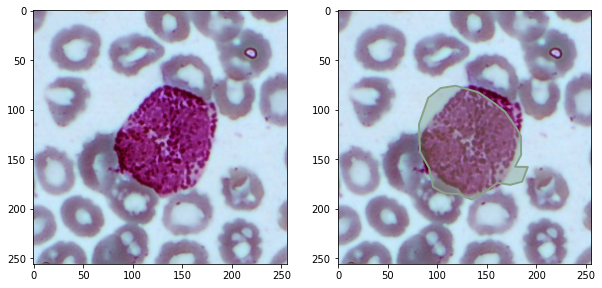

In [362]:
data.visualize(102,'BA_20847.png')

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


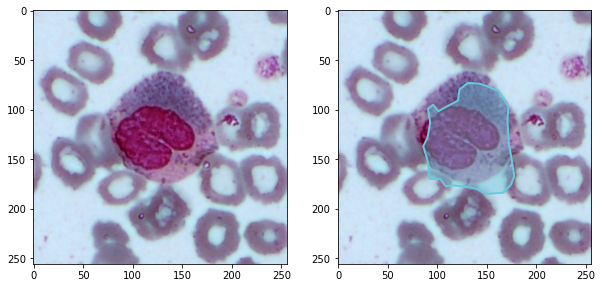

In [363]:
data.visualize(102,'BNE_21041.png')